<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [8]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-11-21 14:22:39--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  57.6MB/s    in 3.6s    

2025-11-21 14:22:45 (56.0 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 157.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 200.6 MB/s eta 0:00:00


In [2]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 148.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 162.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 181.0 MB/s eta 0:00:00


In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [4]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [5]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [6]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


In [7]:
# your code goes here
QUERY= """
    SELECT CompTotal
    FROM main
    WHERE CompTotal IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)
df.value_counts()

CompTotal
100000.0     939
60000.0      839
120000.0     793
80000.0      728
50000.0      705
            ... 
36800.0        1
36720.0        1
177050.0       1
177900.0       1
174500.0       1
Name: count, Length: 3337, dtype: int64

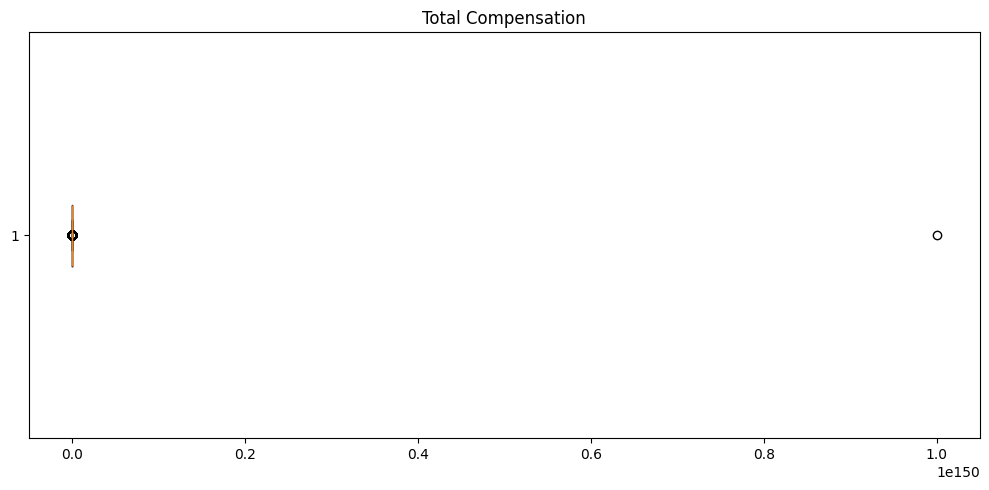

In [8]:
plt.figure(figsize=(10, 5))
plt.boxplot(df['CompTotal'], vert=False)
plt.title('Total Compensation')
plt.tight_layout()
plt.show()

In [9]:
## removing outliers to avoid skewness
q1 = df['CompTotal'].quantile(0.25)
q3 = df['CompTotal'].quantile(0.75)
iqr = q3 - q1

bound_low = q1 - 1.5*iqr
bound_up = q3 + 1.5*iqr

df_plot = df[(df['CompTotal'] >= bound_low) & (df['CompTotal'] <= bound_up)]
df_plot.head()

,CompTotal
1,28000.0
2,85000.0
3,50000.0
4,110000.0
5,126420.0


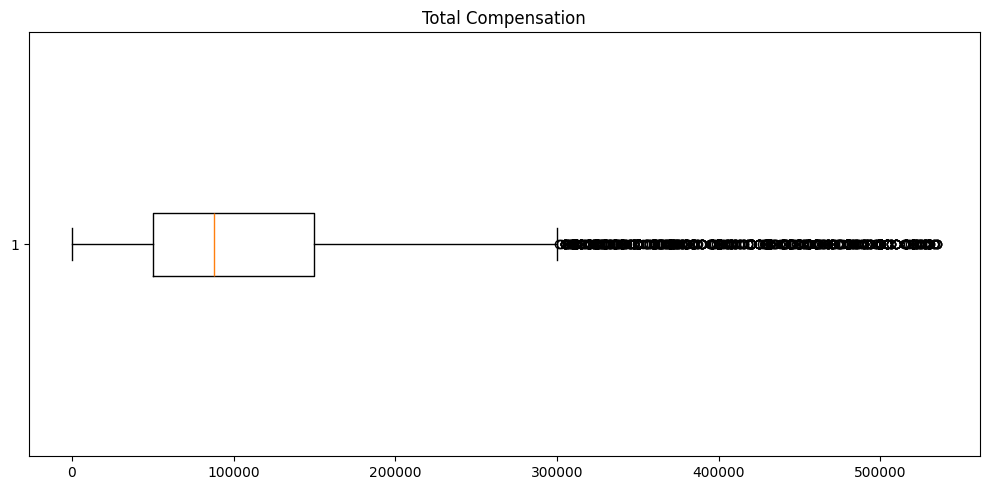

In [10]:
plt.figure(figsize=(10, 5))
plt.boxplot(df_plot['CompTotal'], vert=False)
plt.title('Total Compensation')
plt.tight_layout()
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


In [11]:
# your code goes here
QUERY = """
    SELECT Age
    FROM main
    WHERE Age IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)
df['Age'].value_counts()

Age
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       322
Name: count, dtype: int64

In [12]:
import numpy as np
map_age = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': np.nan
}
df['Age'] = df['Age'].map(map_age)

In [13]:
df['Age'].value_counts()

Age
29.5    23911
39.5    14942
21.0    14098
49.5     6249
59.5     2575
17.0     2568
70.0      772
Name: count, dtype: int64

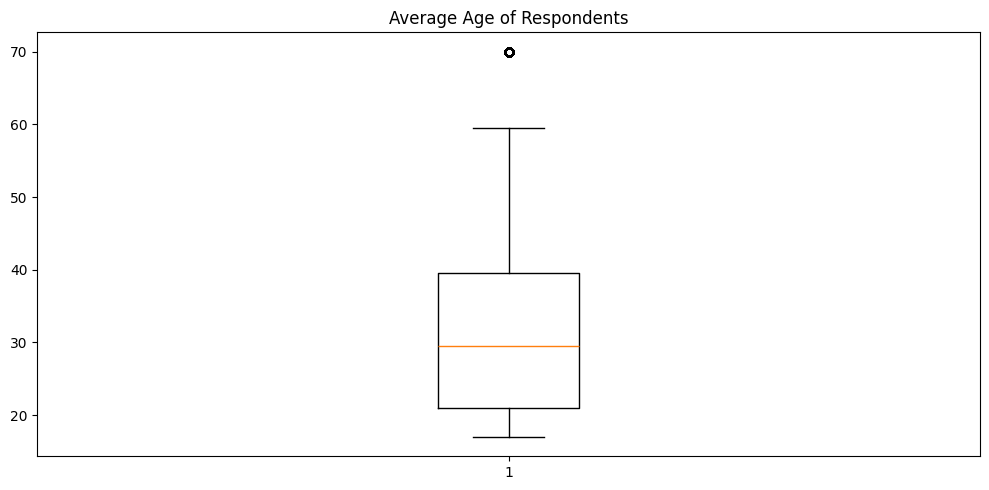

In [14]:
plt.figure(figsize=(10, 5))
plt.boxplot(df['Age'].dropna().values)
plt.title('Average Age of Respondents')
plt.tight_layout()
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


In [15]:
# your code goes here
QUERY = """
    SELECT Age,CompTotal
    FROM main
    WHERE Age IS NOT NULL
    AND CompTotal IS NOT NULL
    GROUP BY Age
"""
df = pd.read_sql_query(QUERY, conn)
df.head(10)

,Age,CompTotal
0,18-24 years old,2040000.0
1,25-34 years old,28000.0
2,35-44 years old,85000.0
3,45-54 years old,95000.0
4,55-64 years old,54000.0
5,65 years or older,43000.0
6,Prefer not to say,140000.0
7,Under 18 years old,1100.0


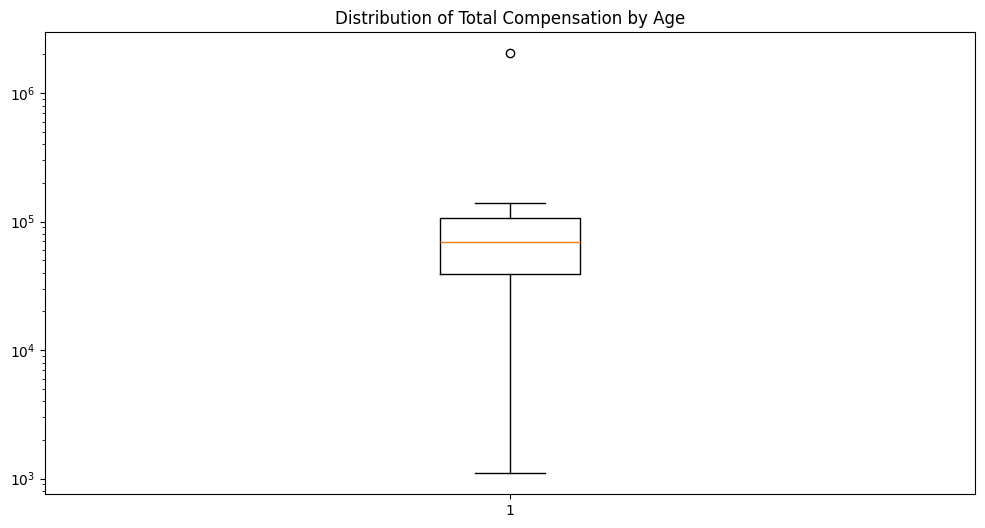

In [16]:
plt.figure(figsize=(12,6))
plt.boxplot(df[["CompTotal"]])
plt.title("Distribution of Total Compensation by Age")
plt.yscale('log')
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


In [19]:
# your code goes here
QUERY = """
    SELECT JobSatPoints_6, CompTotal
    FROM main
    WHERE JobSatPoints_6 IS NOT NULL
    AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)
df.head(10)

,JobSatPoints_6,CompTotal
0,65.0,2040000.0
1,0.0,85000.0
2,20.0,110000.0
3,30.0,126420.0
4,30.0,195000.0
5,25.0,74000.0
6,20.0,170000.0
7,0.0,27000.0
8,30.0,62000.0
9,0.0,80000.0


In [20]:
group = df.groupby('JobSatPoints_6')['CompTotal'].apply(list)

/tmp/ipykernel_300/1552020983.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(group, labels=group.index.astype(int), showfliers=False)


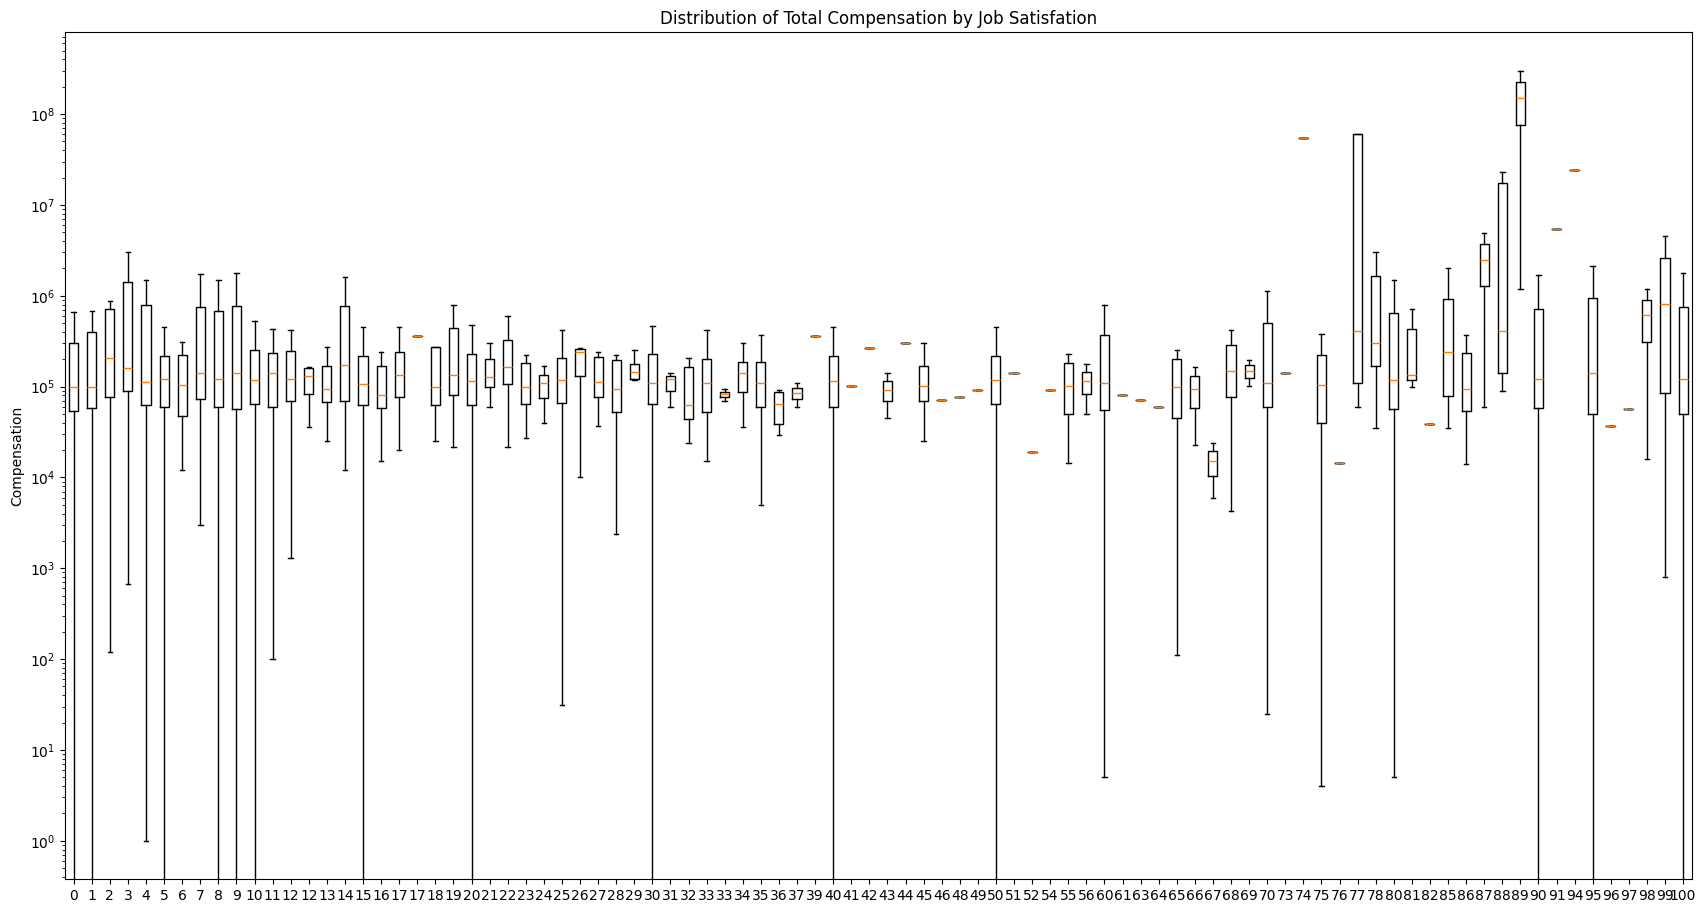

In [27]:
plt.figure(figsize=(21, 11))
plt.boxplot(group, labels=group.index.astype(int), showfliers=False)
plt.title("Distribution of Total Compensation by Job Satisfation")
plt.ylabel("Compensation")
plt.yscale('log')
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


In [28]:
# your code goes here
QUERY = """ 
SELECT ConvertedCompYearly, DevType
FROM main
WHERE ConvertedCompYearly IS NOT NULL
"""

df = pd.read_sql_query(QUERY, conn)
df

,ConvertedCompYearly,DevType
0,7322.0,Data scientist or machine learning specialist
1,30074.0,Academic researcher
2,91295.0,Data scientist or machine learning specialist
3,53703.0,"Developer, back-end"
4,110000.0,Student
...,...,...
23430,44640.0,"Developer, embedded applications or devices"
23431,170000.0,Project manager
23432,116844.0,"Developer, full-stack"
23433,12000.0,"Developer, full-stack"


In [29]:
df['DevType'] = df['DevType'].str.split(';')
df_expl = df.explode('DevType')
df_expl['DevType'] = df_expl['DevType'].str.strip()

In [30]:
top5 = df_expl['DevType'].value_counts().head().index
df_plot = df_expl[df_expl['DevType'].isin(top5)]
df_plot = [group["ConvertedCompYearly"].values for i, group in df_plot.groupby("DevType")]

/tmp/ipykernel_300/2508711837.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df_plot, labels=top5)


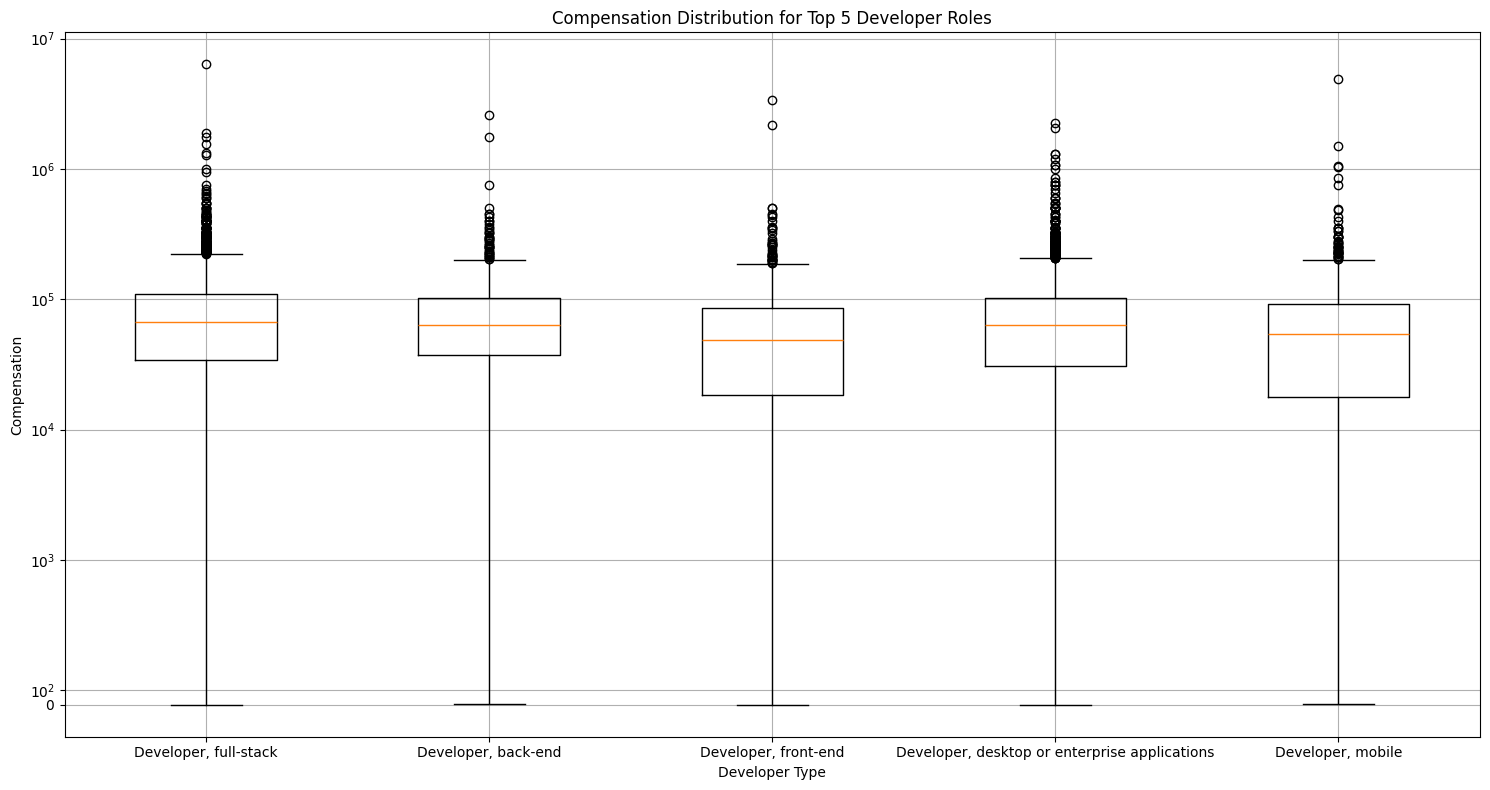

In [32]:
plt.figure(figsize=(15, 8))
plt.boxplot(df_plot, labels=top5)
plt.title("Compensation Distribution for Top 5 Developer Roles") 
plt.ylabel("Compensation")
plt.xlabel("Developer Type")
plt.yscale("symlog", linthresh=1000)
plt.grid(True)
plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


In [33]:
# your code goes here
QUERY = """
    SELECT CompTotal, Country
    FROM main
    WHERE CompTotal IS NOT NULL
    AND Country IS NOT NULL
"""
df= pd.read_sql_query(QUERY, conn)
df.head()

,CompTotal,Country
0,2040000.0,Pakistan
1,28000.0,Austria
2,85000.0,Turkey
3,50000.0,France
4,110000.0,United States of America


In [37]:
top5coun = df['Country'].value_counts().head().index
df_filt = df[df['Country'].isin(top5coun)]
plot = [group['CompTotal'].values for i, group in df_filt.groupby('Country')]
plot

[array([27000., 80000., 65000., ..., 46000., 45000., 24000.], shape=(3004,)),
 array([1100000.,  500000., 4000000., ...,  350000., 2500000.,   10000.],
       shape=(1551,)),
 array([ 50000.,   6000.,    650., ...,  15960.,  48000., 180000.],
       shape=(1610,)),
 array([126420.,  95000., 145000., ..., 130000., 150000., 200000.],
       shape=(2008,)),
 array([110000., 195000., 230000., ..., 130000., 250000., 157000.],
       shape=(7042,))]

/tmp/ipykernel_300/314521419.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(plot, labels=top5coun)


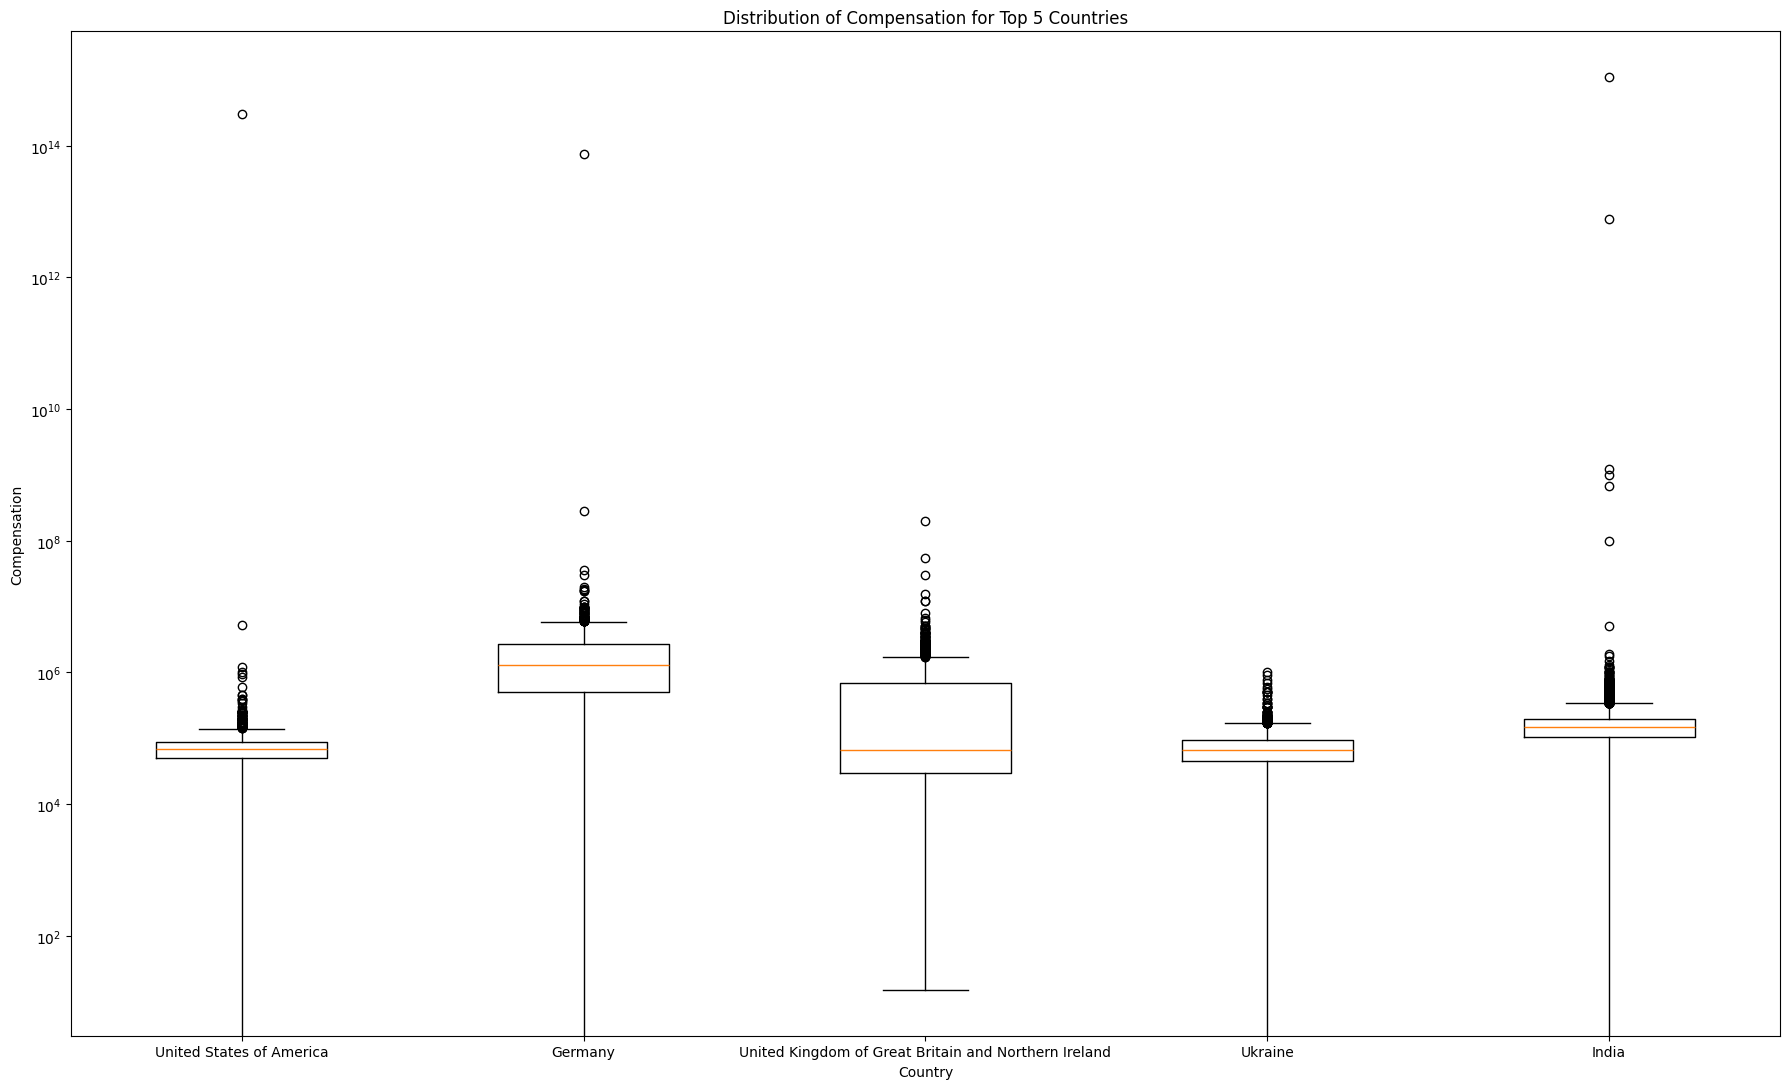

In [38]:
plt.figure(figsize=(18, 11))
plt.boxplot(plot, labels=top5coun)
plt.title("Distribution of Compensation for Top 5 Countries")
plt.xlabel("Country")
plt.ylabel("Compensation")
plt.yscale("log")
plt.tight_layout()
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


In [42]:
# your code goes here
QUERY = """
    SELECT CompTotal, Employment
    FROM main
    WHERE CompTotal IS NOT NULL
    AND Employment IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)
df.head()

,CompTotal,Employment
0,2040000.0,"Employed, full-time;Student, full-time;Indepen..."
1,28000.0,"Employed, full-time"
2,85000.0,"Employed, full-time"
3,50000.0,"Independent contractor, freelancer, or self-em..."
4,110000.0,"Employed, full-time;Student, part-time"


In [43]:
df['Employment'] = df['Employment'].str.split(';')
df_expl = df.explode('Employment')
df_expl['Employment'] = df_expl['Employment'].str.strip()
df_expl['Employment'].unique()

array(['Employed, full-time', 'Student, full-time',
       'Independent contractor, freelancer, or self-employed',
       'Employed, part-time', 'Student, part-time', 'Retired',
       'Not employed, but looking for work',
       'Not employed, and not looking for work'], dtype=object)

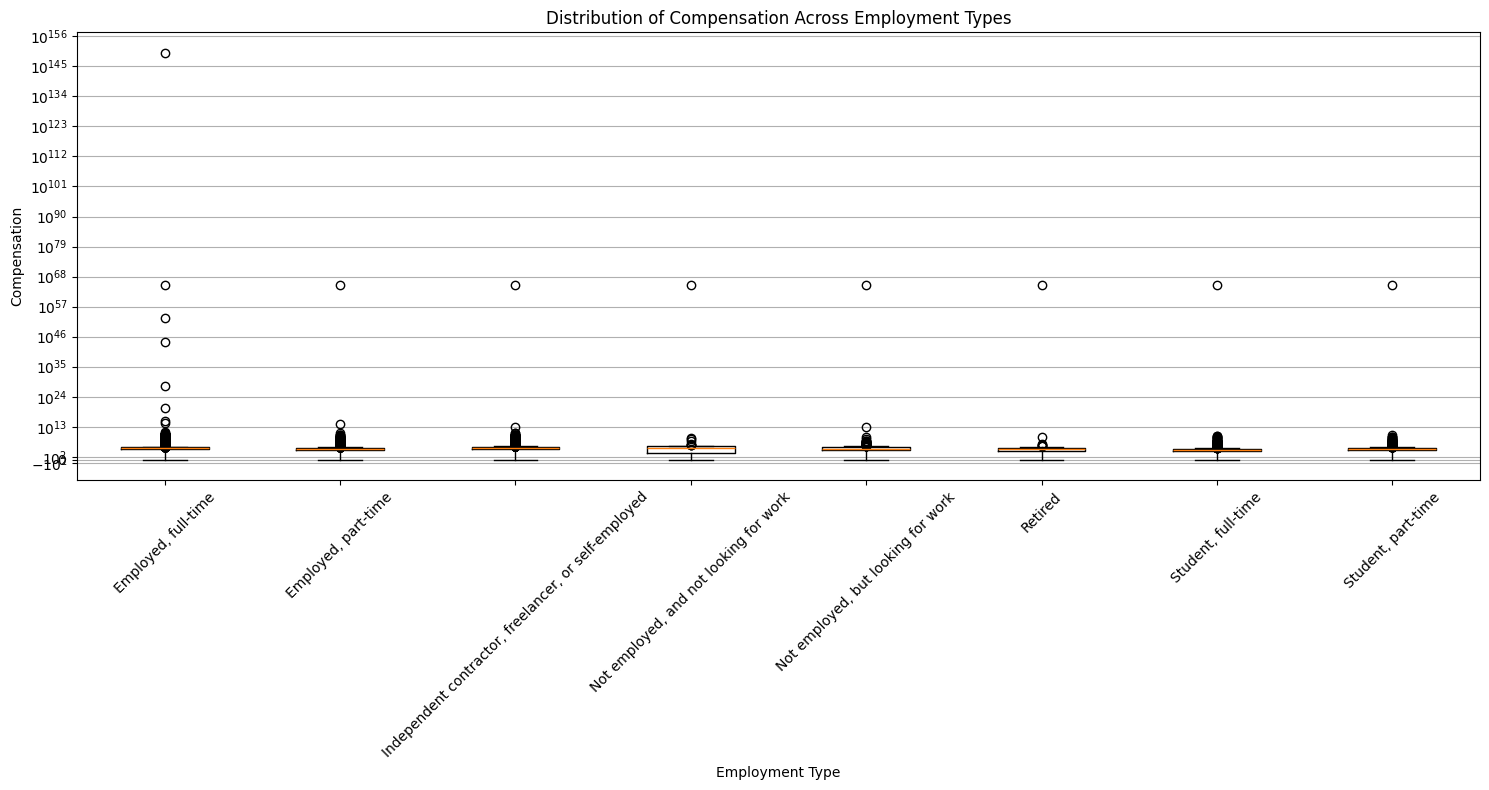

In [45]:
plot = [group['CompTotal'].dropna().values for col, group in df_expl.groupby('Employment')]
labels = list(df_expl.groupby('Employment').groups.keys())
plt.figure(figsize=(15,8)) 
plt.boxplot(plot, tick_labels=labels)
plt.title("Distribution of Compensation Across Employment Types")
plt.ylabel("Compensation")
plt.xlabel("Employment Type")
plt.yscale("symlog", linthresh=100)
plt.grid(visible=True, axis="y")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


In [46]:
# your code goes here
QUERY = """
    SELECT YearsCodePro, JobSatPoints_6 as JobSatisf
    FROM main
    WHERE YearsCodePro IS NOT NULL
    AND JobSatisf IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)
df.head()

,YearsCodePro,JobSatisf
0,17,0.0
1,12,30.0
2,27,0.0
3,10,60.0
4,Less than 1 year,100.0


In [47]:
df['YearsCodePro'].unique()

array(['17', '12', '27', '10', 'Less than 1 year', '18', '15', '6', '7',
       '16', '14', '4', '8', '2', '29', '5', '30', '1', '25', '24', '26',
       '9', '20', '37', '11', '3', '13', '19', '21', '23', '34', '28',
       '32', '22', '33', '40', '39', '31', '35', '41', '38',
       'More than 50 years', '36', '43', '42', '50', '45', '44', '46',
       '48', '47', '49'], dtype=object)

In [48]:
df['YearsCodePro'] = df['YearsCodePro'].replace({'Less than 1 year':0.5, 'More than 50 years':51}).astype(int)
df['YearsCodePro'].unique()

array([17, 12, 27, 10,  0, 18, 15,  6,  7, 16, 14,  4,  8,  2, 29,  5, 30,
        1, 25, 24, 26,  9, 20, 37, 11,  3, 13, 19, 21, 23, 34, 28, 32, 22,
       33, 40, 39, 31, 35, 41, 38, 51, 36, 43, 42, 50, 45, 44, 46, 48, 47,
       49])

/tmp/ipykernel_300/888209551.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(plot, labels=labels)


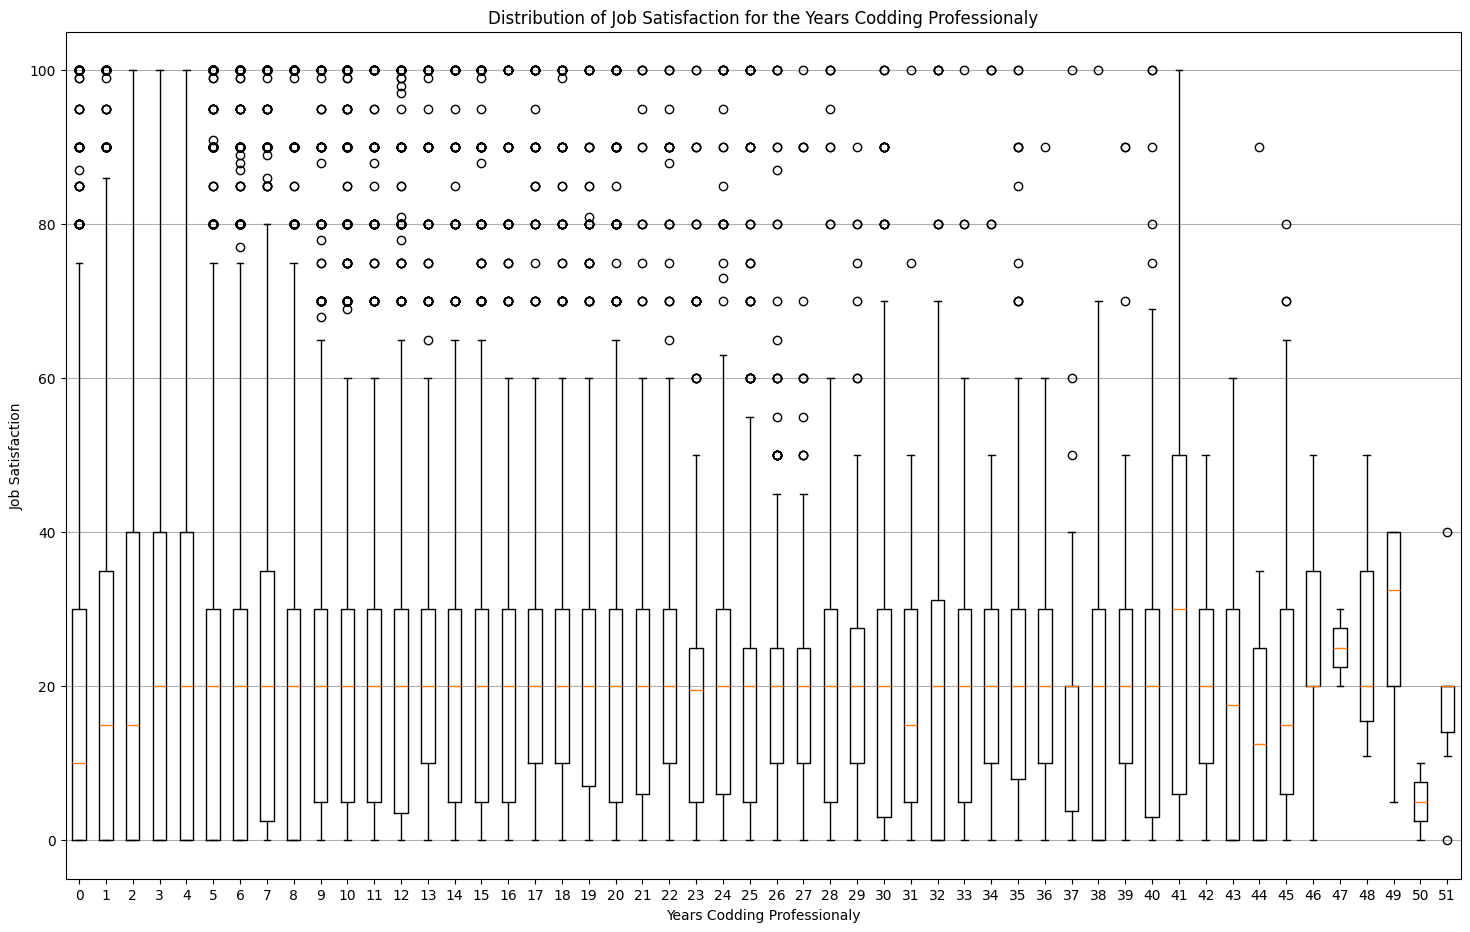

In [50]:
plot = [group['JobSatisf'].dropna().values for col, group in df.groupby('YearsCodePro')]
labels = list(df.groupby('YearsCodePro').groups.keys())
plt.figure(figsize=(18, 11))
plt.boxplot(plot, labels=labels)
plt.title('Distribution of Job Satisfaction for the Years Codding Professionaly')
plt.xlabel('Years Codding Professionaly')
plt.ylabel('Job Satisfaction')
plt.grid(True, axis='y')
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [51]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
